In [1]:
import openai
import os
import json
import pandas as pd
import matplotlib.pyplot as plt
from dotenv import load_dotenv, find_dotenv
_ = load_dotenv(find_dotenv())

openai.api_type = "azure"
openai.api_key = os.getenv('OPENAI_API_KEY')
openai.api_base = "https://ai4ta-openai.openai.azure.com/"
openai.api_version = "2023-05-15"



# Code functionalities selection

In [2]:
html_download = False
gpt_scraping = False

# df visualization settings

In [3]:
#df visualization settings
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('max_colwidth', None)

In [4]:
def get_completion(prompt, deployment_id="gpt-35-turbo", model="gpt-35-turbo"):
    messages = [{"role": "user", "content": prompt}]
    response = openai.ChatCompletion.create(
        deployment_id=deployment_id,
        model=model,
        messages=messages,
        temperature=0, # this is the degree of randomness of the model's output
    )
    return response.choices[0].message["content"]

In [5]:
if html_download == True:
    import requests
    
    url = requests.get("https://xaiworldconference.com/full-programme/")
    htmltext = url.text
    print(htmltext)
    
    with open("xai_full_programme_2.txt", "wt") as f:
         f.write(htmltext)

In [6]:
if gpt_scraping == True:
    with open("xai_full_programme.txt", 'r') as f:
        lines = f.readlines()
        
    html_programme = lines[478:2005]
    len(html_programme)
    
    data=[]
    for i in range(0, len(html_programme), 250):
        print("final row:"+str(i+250)) 
        text = html_programme[i:i+250]
        prompt = f"""
        Locate in the text delimited by triple backticks \
        the html chunck like that:\
            "<div class="workshop  theme_sophia-de-mello-bregner-andresen-teather-sala-7" data-workshopID="2154">
          <div class="favorite" title="Pick this workshop">
                <svg><use xlink:href="#fav-star"></use></svg>
              </div>  <h4 class="title">Perlocution vs Illocution: How Different Interpretations of the Act of Explaining Impact on the Evaluation of Explanations and XAI</h4>
          <p class="quick_info"><span class="presenter">Francesco Sovrano, Fabio Vitali</span><span class="location">Sophia de Mello Bregner Andresen Teather</span></p>
          <div class="details">
            <div class="description"></div>
                <div class="bio"></div>
              </div>
          <div class="data">
            <span class="session interdisciplinary-perspectives-on-xai">Wed 9:30 am - 11:00 am</span>        <div class="themes"><span class="theme theme_sophia-de-mello-bregner-andresen-teather-sala-7">Sophia de Mello Bregner Andresen teather (SALA 7)</span></div>      </div>
          </div>"\
        Each of these chuncks corresponds to one speech. 
        
        For each speech extract the following information: 
        1- title, 
        2- presenter, 
        3- session, 
        4- schedule
        Based on the schema that can be inferred from the example:
        In the chunck:
        the value for 'title' is \
        "Perlocution vs Illocution: How Different Interpretations of the Act of Explaining Impact on the Evaluation of Explanations and XAI"\
        for 'presenter' the value is "Francesco Sovrano, Fabio Vitali"\
        for 'session' the value is "interdisciplinary-perspectives-on-xai"\
        for 'schedule' the value is "Wed 9:30 am - 11:00 am"\
        
        If you can't find the value set it as N/A.
        
        After extracting all the information for each speech format them in one JSON \
        in which the keys are:\
        title, presenter, session, schedule \
        Put the JSONs in a python list, and provide the list as a output.  
        Very important that the JSONs are formatted correctly with the double quotes!! \
        
        
        ```{text}```
        """
        response = get_completion(prompt)
        print(response)
        data.append(json.loads(response))

    flat_data = []
    for sublist in data:
        flat_data.extend(sublist)

    # Group the dictionaries by key
    grouped_data = {}
    for item in flat_data:
        #print(item.items())
        for key, value in item.items():
            if key not in grouped_data:
                grouped_data[key] = []
            grouped_data[key].append(value)
    
    #print(grouped_data)
    # Convert the resulting dictionary to a single dictionary with lists as values
    result = {}
    for key, value in grouped_data.items():
        result[key] = value
    
    # Print the resulting dictionary
    print(result)

    df = pd.DataFrame(result)
    #the values given as an exaples sotimes are added as output ---> I delete them
    df = df.drop_duplicates(ignore_index=True)
    df = df.fillna('')
    

In [7]:
#df.to_csv("df_programme_2.csv", index=False)


In [8]:
df = pd.read_csv("df_programme.csv")
df = df.fillna('')

In [9]:
df.columns

Index(['title', 'presenter', 'session', 'schedule'], dtype='object')

# Data analysis

## Sessions hist

<Axes: ylabel='session'>

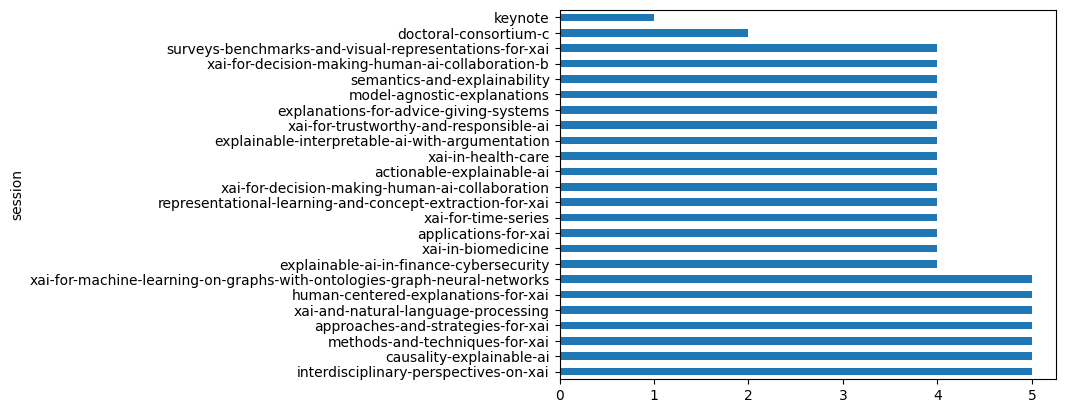

In [10]:
df['session'].value_counts().plot(kind='barh')

In [11]:
df.shape

(98, 4)

In [57]:
df['session'].unique()

array(['interdisciplinary-perspectives-on-xai',
       'model-agnostic-explanations',
       'xai-for-decision-making-human-ai-collaboration',
       'actionable-explainable-ai', 'keynote',
       'semantics-and-explainability',
       'xai-for-decision-making-human-ai-collaboration-b',
       'explainable-ai-in-finance-cybersecurity', 'xai-in-biomedicine',
       'causality-explainable-ai', 'human-centered-explanations-for-xai',
       'xai-and-natural-language-processing',
       'xai-for-machine-learning-on-graphs-with-ontologies-graph-neural-networks',
       'explanations-for-advice-giving-systems',
       'xai-for-trustworthy-and-responsible-ai',
       'explainable-interpretable-ai-with-argumentation',
       'xai-in-health-care', 'approaches-and-strategies-for-xai',
       'methods-and-techniques-for-xai',
       'representational-learning-and-concept-extraction-for-xai',
       'xai-for-time-series', 'doctoral-consortium-c',
       'applications-for-xai',
       'surveys-bench

In [12]:
df

,title,presenter,session,schedule
0,Perlocution vs Illocution: How Different Interpretations of the Act of Explaining Impact on the Evaluation of Explanations and XAI,"Francesco Sovrano, Fabio Vitali",interdisciplinary-perspectives-on-xai,Wed 9:30 am - 11:00 am
1,Speeding things up. Can explainability improve human learning?,"Jakob Mannmeusel, Mario Rothfelder, and Samaneh Khoshrou",interdisciplinary-perspectives-on-xai,Wed 9:30 am - 11:00 am
2,Statutory Professions in AI governance and their consequences for explainable AI,"Labhaoise NiFhaolain, Andrew Hines, Vivek Nallur",interdisciplinary-perspectives-on-xai,Wed 9:30 am - 11:00 am
3,"Dear XAI Community, We Need to Talk! Fundamental Misconceptions in Current XAI Research","Timo Freiesleben, Gunnar Konig",interdisciplinary-perspectives-on-xai,Wed 9:30 am - 11:00 am
4,XAI Requirements in Smart Production Processes: A Case Study,"Deborah Baum, Kevin Baum, Timo P. Gros, Verena Wolf",interdisciplinary-perspectives-on-xai,Wed 9:30 am - 11:00 am
5,iPDP: On Partial Dependence Plots in Dynamic Modeling Scenarios,"Maximilian Muschalik, Fabian Fumagalli, Rohit Jagtani, Barbara Hammer, Eyke Hullermeier",model-agnostic-explanations,Wed 9:30 am - 11:00 am
6,Algorithm-Agnostic Feature Attributions for Clustering,"Christian A. Scholbeck, Henri Funk, Giuseppe Casalicchio",model-agnostic-explanations,Wed 9:30 am - 11:00 am
7,Feature Importance versus Feature Influence and What It Signifies for Explainable AI,Kary Framling,model-agnostic-explanations,Wed 9:30 am - 11:00 am
8,SAC-FACT: Soft Actor-Critic Reinforcement Learning for Counterfactual Explanations,"Fatima Ezzeddine, Omran Ayoub, Davide Andreoletti, Silvia Giordano",model-agnostic-explanations,Wed 9:30 am - 11:00 am
9,PERFEX: Classifier Performance Explanations for Trustworthy AI Systems,"Erwin Walraven, Ajaya Adhikari, Cor J. Veenman",xai-for-decision-making-human-ai-collaboration,Wed 2:30 pm - 3:30 pm


In [13]:
df.columns

Index(['title', 'presenter', 'session', 'schedule'], dtype='object')

In [22]:
df[df['schedule'].str.contains('wed', case= False)].shape, df[df['schedule'].str.contains('thu', case= False)].shape, df[df['schedule'].str.contains('fri', case= False)].shape

((34, 4), (36, 4), (28, 4))

## subtopic search

### federated

In [14]:
df[df['title'].str.contains('federated', case= False)]

,title,presenter,session,schedule
10,Explaining Black-Boxes in Federated Learning,"Luca Corbucci, Riccardo Guidotti, Anna Monreale",xai-for-decision-making-human-ai-collaboration,Wed 2:30 pm - 3:30 pm
67,Federated Learning of Explainable Artificial Intelligence Models for Predicting Parkinson’s Disease Progression,"Jose Luis Corcuera Barcena, Pietro Ducange, Francesco Marcelloni, Alessandro Renda, and Fabrizio Ruffini",xai-in-health-care,Thu 3:30 pm - 4:30 pm


### couterfactual

In [15]:
df[df['title'].str.contains('counterfactual', case= False)]

,title,presenter,session,schedule
8,SAC-FACT: Soft Actor-Critic Reinforcement Learning for Counterfactual Explanations,"Fatima Ezzeddine, Omran Ayoub, Davide Andreoletti, Silvia Giordano",model-agnostic-explanations,Wed 9:30 am - 11:00 am
36,Counterfactual Explanations for Graph Classification Through the Lenses of Density,"Carlo Abrate, Giulia Preti, Francesco Bonchi",causality-explainable-ai,Thu 9:30 am - 11:00 am
38,ABC-GAN: Spatially Constrained Counterfactual Generation for Image Classification Explanations,"Dimitry Mindlin, Malte Schilling, Philipp Cimiano",causality-explainable-ai,Thu 9:30 am - 11:00 am
41,For Better or Worse: The Impact of Counterfactual Explanations’ Directionality on User Behavior in xAI,"Ulrike Kuhl, Andre Artelt, Barbara Hammer",human-centered-explanations-for-xai,Thu 9:30 am - 11:00 am
47,Toward Inclusive Online Environments: Counterfactual-Inspired XAI for Detecting and Interpreting Hateful and Offensive Tweets,"Muhammad Deedahwar Mazhar Qureshi, M. Atif Qureshi, Wael Rashwan",xai-and-natural-language-processing,Thu 11:30 am - 1:00 pm
57,Semantic Meaningfulness: Evaluating Counterfactual Approaches for Real-World Plausibility and Feasibility,"Jacqueline Hollig, Aniek F. Markus, Jef de Slegte, Prachi Bagave",explanations-for-advice-giving-systems,Thu 2:30 pm - 3:30 pm
82,Outcome-Guided Counterfactuals from a Jointly Trained Generative Latent Space,"Eric Yeh, Pedro Sequeira, Jesse Hostetler, Melinda Gervasio",representational-learning-and-concept-extraction-for-xai,Fri 3:00 pm - 4:00 pm
96,Contrastive Visual Explanations for Reinforcement Learning via Counterfactual Rewards,"Xiaowei Liu, Kevin McAreavey, Weiru Liu",surveys-benchmarks-and-visual-representations-for-xai,Fri 4:30 pm - 5:30 pm


### fairness

In [16]:
df[df['title'].str.contains('fairness', case= False)]

,title,presenter,session,schedule
59,Leveraging Group Contrastive Explanations for Handling Fairness,"Alessandro Castelnovo, Nicole Inverardi, Lorenzo Malandri, Fabio Mercorio, Mario Mezzanzanica, Andrea Seveso",xai-for-trustworthy-and-responsible-ai,Thu 2:30 pm - 3:30 pm
60,LUCID–GAN: Conditional Generative Models to Locate Unfairness,"Andres Algaba, Carmen Mazijn, Carina Prunkl, Jan Danckaert, Vincent Ginis",xai-for-trustworthy-and-responsible-ai,Thu 2:30 pm - 3:30 pm


### reinforcement learning

In [33]:
df[df['title'].str.contains('reinforcement', case= False)]

,title,presenter,session,schedule
8,SAC-FACT: Soft Actor-Critic Reinforcement Learning for Counterfactual Explanations,"Fatima Ezzeddine, Omran Ayoub, Davide Andreoletti, Silvia Giordano",model-agnostic-explanations,Wed 9:30 am - 11:00 am
25,Explaining Deep Reinforcement Learning-based methods for control of building HVAC systems,"Javier Jiménez-Raboso, Antonio Manjavacas, Alejandro, Campoy-Nieves, Miguel Molina-Solana, Juan Gómez-Romero",xai-for-decision-making-human-ai-collaboration-b,Wed 3:30 pm - 4:30 pm
78,IxDRL: A Novel Explainable Deep Reinforcement Learning Toolkit based on Analyses of Interestingness,"Pedro Sequeira, Melinda Gervasio",methods-and-techniques-for-xai,Fri 9:30 am - 11:00 am
96,Contrastive Visual Explanations for Reinforcement Learning via Counterfactual Rewards,"Xiaowei Liu, Kevin McAreavey, Weiru Liu",surveys-benchmarks-and-visual-representations-for-xai,Fri 4:30 pm - 5:30 pm


### eval

In [42]:
df[df['title'].str.contains('eval', case= False)]

,title,presenter,session,schedule
0,Perlocution vs Illocution: How Different Interpretations of the Act of Explaining Impact on the Evaluation of Explanations and XAI,"Francesco Sovrano, Fabio Vitali",interdisciplinary-perspectives-on-xai,Wed 9:30 am - 11:00 am
15,Explainable performance evaluation in machine learning,Prof. Peter Flach,keynote,Wed 11:30 am - 12:30 pm
21,Evaluating the Stability of Semantic Concept Representations in CNNs for Robust Explainability,"Georgii Mikriukov, Gesina Schwalbe, Christian Hellert, Korinna Bade",semantics-and-explainability,Wed 3:30 pm - 4:30 pm
29,Evaluating feature relevance XAI in network intrusion detection,"Julian Tritscher, Maximilian Wolf, Andreas Hotho, Daniel Schlor",explainable-ai-in-finance-cybersecurity,Wed 4:30 pm - 5:30 pm
30,Evaluating explanations of an Alzheimer’s Disease 18F-FDG Brain PET black-box classifier,"Lisa Anita De Santi, Filippo Bargagna, Maria Filomena Santarelli, Vincenzo Positano",xai-in-biomedicine,Wed 4:30 pm - 5:30 pm
31,An Evaluation of Contextual Importance and Utility for Outcome Explanation of Black-box Predictions for medical datasets,"Avleen Malhi, Kary Framling",xai-in-biomedicine,Wed 4:30 pm - 5:30 pm
42,Towards a Comprehensive Human-Centred Evaluation Framework for Explainable AI,"Ivania Donoso-Guzman, Jeroen Ooge, Denis Parra, Katrien Verbert",human-centered-explanations-for-xai,Thu 9:30 am - 11:00 am
43,Development of a human-centred psychometric test for the evaluation of explanations produced by XAI methods,"Giulia Vilone, Luca Longo",human-centered-explanations-for-xai,Thu 9:30 am - 11:00 am
44,Evaluating self-attention interpretability through human-grounded experimental protocol,"Milan Bhan, Nina Achache, Victor Legrand, Annabelle Blangero, Nicolas Chesneau",xai-and-natural-language-processing,Thu 11:30 am - 1:00 pm
53,Evaluating Link Prediction Explanations for Graph Neural Networks,"Claudio Borile, Alan Perotti, and Andre Panisson",xai-for-machine-learning-on-graphs-with-ontologies-graph-neural-networks,Thu 11:30 am - 1:00 pm


In [43]:
df[df['title'].str.contains('metric', case= False)]

,title,presenter,session,schedule
43,Development of a human-centred psychometric test for the evaluation of explanations produced by XAI methods,"Giulia Vilone, Luca Longo",human-centered-explanations-for-xai,Thu 9:30 am - 11:00 am


In [44]:
df[df['title'].str.contains('latent', case= False)]

,title,presenter,session,schedule
80,An Exploration of the Latent Space of a Convolutional Variational Autoencoder for theGeneration of Musical Instrument Tones,"Anastasia Natsiou, Sean O’Leary, and Luca Longo",representational-learning-and-concept-extraction-for-xai,Fri 3:00 pm - 4:00 pm
82,Outcome-Guided Counterfactuals from a Jointly Trained Generative Latent Space,"Eric Yeh, Pedro Sequeira, Jesse Hostetler, Melinda Gervasio",representational-learning-and-concept-extraction-for-xai,Fri 3:00 pm - 4:00 pm


In [40]:
df[df['title'].str.contains('anomaly', case= False)]

,title,presenter,session,schedule
11,Explainable Automated Anomaly Recognition in Failure Analysis: is Deep Learning Doing it Correctly?,"Leonardo Arrighi, Sylvio Barbon Jr., Felice Andrea Pellegrino, Michele Simonato, Marco Zullich",actionable-explainable-ai,Wed 2:30 pm - 3:30 pm


In [46]:
df[df['title'].str.contains('gen', case= False)]

,title,presenter,session,schedule
17,Closing the Loop: Testing ChatGPT to Generate Model Explanations to Improve Human Labelling of Sponsored Content on Social Media,"Thales Bertaglia, Stefan Huber, Catalina Goanta, Gerasimos Spanakis, Adriana Iamnitchi",xai-for-decision-making-human-ai-collaboration,Wed 2:30 pm - 3:30 pm
38,ABC-GAN: Spatially Constrained Counterfactual Generation for Image Classification Explanations,"Dimitry Mindlin, Malte Schilling, Philipp Cimiano",causality-explainable-ai,Thu 9:30 am - 11:00 am
46,From Black Boxes to Conversations: Incorporating XAI in a Conversational Agent,"Van Bach Nguyen, Jörg Schlötterer, Christin Seifert",xai-and-natural-language-processing,Thu 11:30 am - 1:00 pm
60,LUCID–GAN: Conditional Generative Models to Locate Unfairness,"Andres Algaba, Carmen Mazijn, Carina Prunkl, Jan Danckaert, Vincent Ginis",xai-for-trustworthy-and-responsible-ai,Thu 2:30 pm - 3:30 pm
67,Federated Learning of Explainable Artificial Intelligence Models for Predicting Parkinson’s Disease Progression,"Jose Luis Corcuera Barcena, Pietro Ducange, Francesco Marcelloni, Alessandro Renda, and Fabrizio Ruffini",xai-in-health-care,Thu 3:30 pm - 4:30 pm
75,Relating the Partial Dependence Plot and Permutation Feature Importance to the Data Generating Process,"Christoph Molnar, Timo Freiesleben, Gunnar Konig, Julia Herbinger, Tim Reisinger, Giuseppe Casalicchio, Marvin N. Wright, Bernd Bischl",methods-and-techniques-for-xai,Fri 9:30 am - 11:00 am
80,An Exploration of the Latent Space of a Convolutional Variational Autoencoder for theGeneration of Musical Instrument Tones,"Anastasia Natsiou, Sean O’Leary, and Luca Longo",representational-learning-and-concept-extraction-for-xai,Fri 3:00 pm - 4:00 pm
82,Outcome-Guided Counterfactuals from a Jointly Trained Generative Latent Space,"Eric Yeh, Pedro Sequeira, Jesse Hostetler, Melinda Gervasio",representational-learning-and-concept-extraction-for-xai,Fri 3:00 pm - 4:00 pm
97,Explainable Artificial Intelligence in Education: A Comprehensive Review,"Blerta Abazi Chaushi, Besnik Selimi, Agron Chaushi, Marika Apostolova",surveys-benchmarks-and-visual-representations-for-xai,Fri 4:30 pm - 5:30 pm


In [48]:
df[df['title'].str.contains('symbolic', case= False)]

,title,presenter,session,schedule


In [49]:
df[df['title'].str.contains('neuro', case= False)]

,title,presenter,session,schedule


In [50]:
df[df['title'].str.contains('embedding', case= False)]

,title,presenter,session,schedule


In [51]:
df[df['title'].str.contains('visual', case= False)]

,title,presenter,session,schedule
95,Towards the Visualization of Aggregated Class Activation Maps to Analyse the Global Contribution of Class Features,"Igor Cheperanov, David Sessler, Alex Ulmer, Hendrik Lücke-Tieke, Jörn Kohlhammer",surveys-benchmarks-and-visual-representations-for-xai,Fri 4:30 pm - 5:30 pm
96,Contrastive Visual Explanations for Reinforcement Learning via Counterfactual Rewards,"Xiaowei Liu, Kevin McAreavey, Weiru Liu",surveys-benchmarks-and-visual-representations-for-xai,Fri 4:30 pm - 5:30 pm


In [32]:
df[df['title'].str.contains('causal', case= False)]

,title,presenter,session,schedule
34,Explaining Model Behavior with Global Causal Analysis,"Marcel Robeer, Floris Bex, Ad Feelders, Henry Prakken",causality-explainable-ai,Thu 9:30 am - 11:00 am
35,The Importance of Time in Causal Algorithmic Recourse,"Isacco Beretta, Martina Cinquini",causality-explainable-ai,Thu 9:30 am - 11:00 am
86,Causal-based Spatio-Temporal Graph Neural Networks for Industrial Internet of Things Multivariate Time Series Forecasting,"Amir Miraki, Austeja Dapkute, Vytautas Siozinys, Martynas Jonaitis, Reza Arghandeh",xai-for-time-series,Fri 3:00 pm - 4:00 pm


In [17]:
df[df['presenter'].str.contains('mercorio', case= False)]

,title,presenter,session,schedule
59,Leveraging Group Contrastive Explanations for Handling Fairness,"Alessandro Castelnovo, Nicole Inverardi, Lorenzo Malandri, Fabio Mercorio, Mario Mezzanzanica, Andrea Seveso",xai-for-trustworthy-and-responsible-ai,Thu 2:30 pm - 3:30 pm


In [30]:
df[df['presenter'].str.contains('perotti', case= False)]

,title,presenter,session,schedule
18,HOLMES: HOLonym-MEronym based Semantic inspection for Convolutional Image Classifiers,"Francesco Dibitonto, Fabio Garcea, André Panisson, Alan Perotti, Lia Morra",semantics-and-explainability,Wed 3:30 pm - 4:30 pm
19,Beyond One-Hot-Encoding: Injecting Semantics to Drive Image Classifiers,"Alan Perotti, Simone Bertolotto, Eliana Pastor, André Panisson",semantics-and-explainability,Wed 3:30 pm - 4:30 pm
53,Evaluating Link Prediction Explanations for Graph Neural Networks,"Claudio Borile, Alan Perotti, and Andre Panisson",xai-for-machine-learning-on-graphs-with-ontologies-graph-neural-networks,Thu 11:30 am - 1:00 pm
